In [1]:
# !pip install attention

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# %load tensor.py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from attention import Attention

In [7]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=5000)

In [8]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [9]:
# 모델 생성
model = Sequential()
model.add(Embedding(5000, 100)) # 단어 임베딩
model.add(Dropout(0.5)) # 노드 꺼줌(50%)
model.add(LSTM(64, return_sequences = True)) # node 수
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience= 3)

In [13]:
history = model.fit(x_train, y_train, batch_size= 40, epochs= 200, validation_data=(x_test,y_test), callbacks= [early_stopping])

Epoch 1/200
625/625 [==============================] - 199s 315ms/step - loss: 0.3921 - accuracy: 0.8150 - val_loss: 0.3258 - val_accuracy: 0.8590
Epoch 2/200
625/625 [==============================] - 194s 310ms/step - loss: 0.2441 - accuracy: 0.9020 - val_loss: 0.2783 - val_accuracy: 0.8841
Epoch 3/200
625/625 [==============================] - 191s 305ms/step - loss: 0.1929 - accuracy: 0.9239 - val_loss: 0.3071 - val_accuracy: 0.8834
Epoch 4/200
625/625 [==============================] - 189s 302ms/step - loss: 0.1602 - accuracy: 0.9374 - val_loss: 0.3116 - val_accuracy: 0.8794
Epoch 5/200
625/625 [==============================] - 195s 312ms/step - loss: 0.1427 - accuracy: 0.9457 - val_loss: 0.3520 - val_accuracy: 0.8813


In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

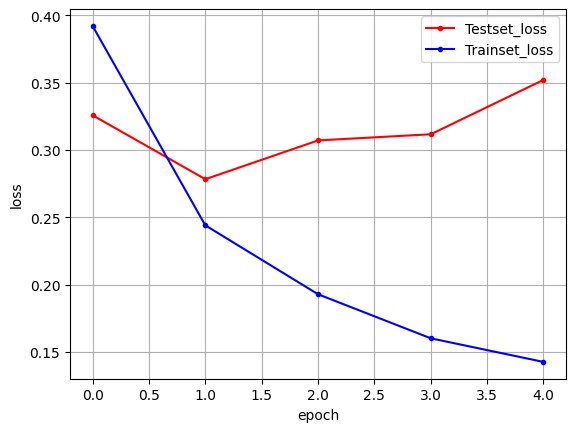

In [15]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.',c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()